# Actividad - Ecuaciones diferenciales

1. Resolver numéricamente con `solve_ivp` la siguiente ecuación diferencial:
$$\frac{dx}{dt}=\frac{x}{t+1}$$

In [4]:
from scipy.integrate import solve_ivp, odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
def fulanito(t, x) :
    return x/(t+1)

t= [0, 10]
x0 = np.array([0.5])
sol_x = solve_ivp(fulanito, t, x0)
sol_x

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-01  1.100e+00  1.000e+01]
        y: [[ 5.000e-01  5.500e-01  1.050e+00  5.500e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 20
     njev: 0
      nlu: 0

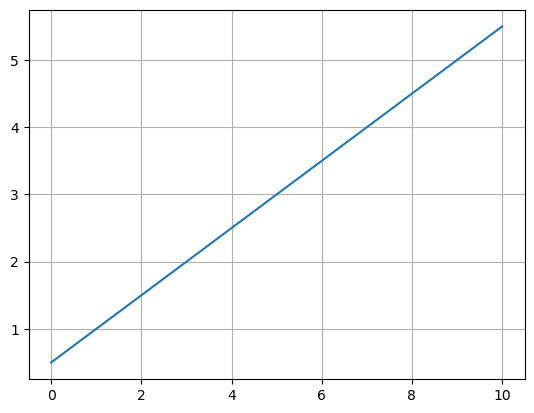

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.plot(sol_x.t, sol_x.y[0, :])
plt.grid()

In [9]:
solve_ivp?

Grafique con condición inicial $x_0 = 2$

In [13]:
def fulanito(t, x) :
    return x/(t+1)

t= [0, 10]
x0 = np.array([2])
sol_x = solve_ivp(fulanito, t, x0)
sol_x

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-01  1.100e+00  1.000e+01]
        y: [[ 2.000e+00  2.200e+00  4.200e+00  2.200e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 20
     njev: 0
      nlu: 0

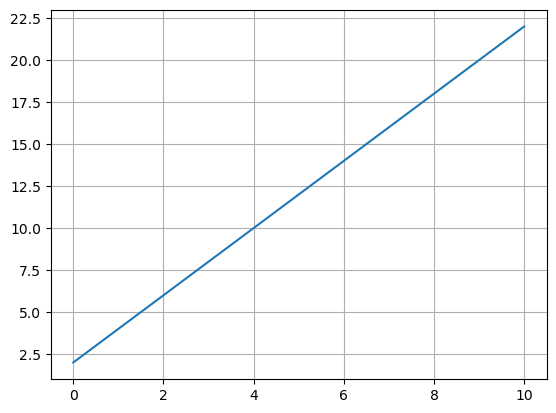

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.plot(sol_x.t, sol_x.y[0, :])
plt.grid()

2. Encuentre la solución numérica para un oscilador armónico simple:

$$
\frac{d^2 x}{dt^2} +  \omega_{0}^2 x = 0.
$$
Donde $x_0=0.5$, $\dot{x}_0=0.1$ y $\omega_0=3$.

2.1 Defina una función, cuyos argumentos de entrada sean:


1. el tiempo $t$,
2. el arreglo $[x,\dot{x}]$.

Y la salida:

1. el arreglo $[\dot{x},\ddot{x}]$.

  Considerando el argumento de la frecuencia natural $\omega_0$ debe ser una variable global.

In [18]:
from scipy.integrate import solve_ivp


def oscilador(t, X, w0):
    x = X[0]
    v = X[1]
    dx = v
    dv = -w0**2*x
    return [dx, dv]

tspan =[0,10]
x0 = np.array([0.5, 0.1])
sol = solve_ivp(oscilador, tspan, x0, args= (3,), max_step=0.01)

Grafique

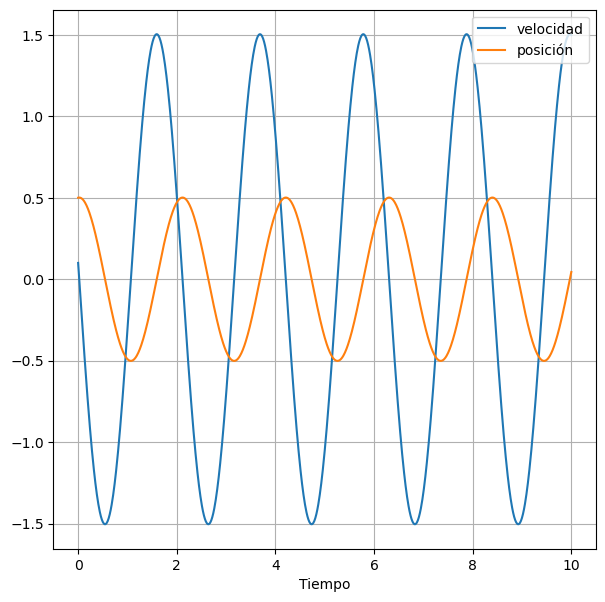

In [20]:
%matplotlib inline

plt.figure(figsize=(7, 7))
plt.plot(sol.t, sol.y[1, :], label = "velocidad")
plt.plot(sol.t, sol.y[0, :], label = "posición")
plt.legend(loc = "best")
plt.xlabel("Tiempo")
plt.grid()

TypeError: 'function' object is not subscriptable

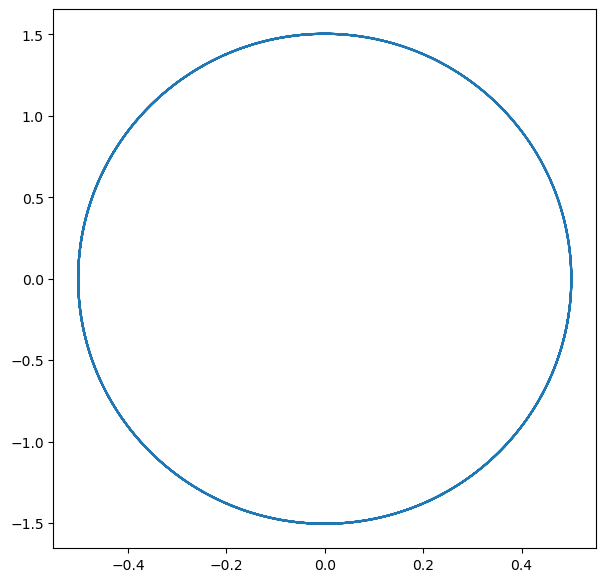

In [21]:
%matplotlib inline

plt.figure(figsize=(7, 7))
plt.plot(sol.y[0, :], sol.y[1, :])
plt.ylabel["velocidad"]
plt.xlabel["posición"]
plt.grid()

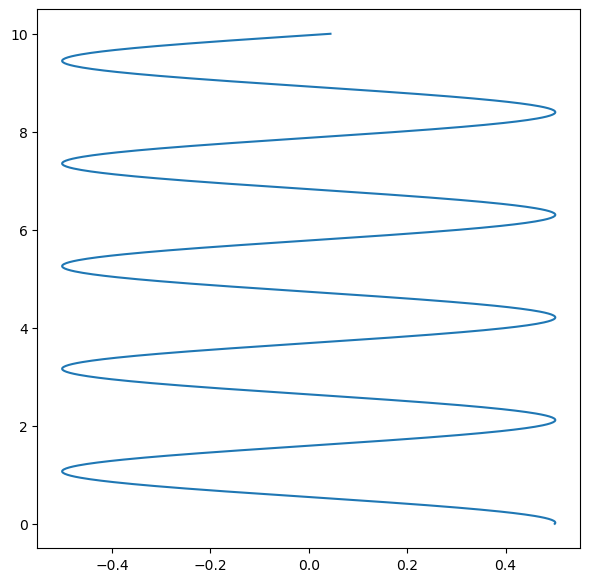

In [22]:
plt.figure(figsize=(7, 7))
plt.plot(sol.y[0, :], sol.t)

Asigne a los parámetros de la solución analítica $C_1=x_0$ y $C_2=\frac{\dot{x}_0}{\omega_0}$.

In [23]:
def pos(t, w0, x0, v0) :
    return x0*np.cos(w0*t) + v0/w0*np.sin(w0*t)

def vel(t, w0, x0, v0) :
    return -x0*w0*np.sin(w0*t) + v0*np.cos(w0*t)

<function __main__.vel(t, w0, x0, v0)>

Redefina la función para graficarla (con la palabra reservada ***def***) en un intervalo de tiempo de 0 a 10 segundos. Comparela en un mismo grafico con la solución numérica obtenida.

ValueError: operands could not be broadcast together with shapes (2,) (10000,) 

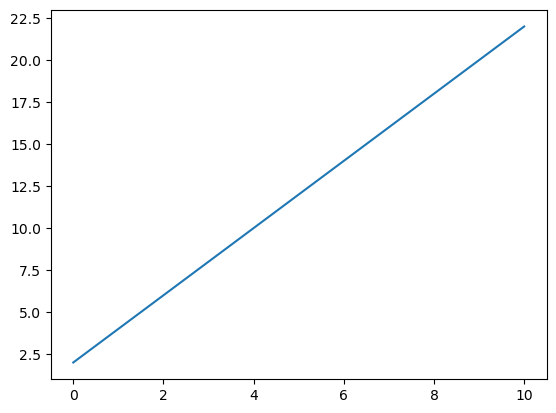

In [35]:
plt.figure()
plt.plot(sol_x.t, sol_x.y[0, :])


ta = np.linspace(0, 10, 10000)
xa= pos(ta, w0, x0, v0)
tspan =[0, 10]



plt.plot(t, x0, lw=5, label = "solucion analítica")

plt.plot(sol_x.t, sol_x.y[0, :], label = "solucion numérica")
plt.legend(loc = "best")